The notebook implements a full CNN-based image-classification workflow for the Flatfield dataset, covering dependency installation, data loading, preprocessing, label encoding, train–test splitting, and data augmentation. It builds a Convolutional Neural Network using Keras layers such as Conv2D, MaxPooling, Flatten, and Dense, then trains and validates the model while plotting accuracy and loss curves. The notebook also includes SHAP-based explainability and initial Streamlit UI components. Based on the captured output, the final model achieved a test accuracy of 0%, with the logs showing: “accuracy: 0.0000e+00 — loss: 2.8515 — ✅ Test Accuracy: 0.00%”, indicating that the model failed to learn from the dataset, likely requiring dataset inspection or architectural adjustments.

In [ ]:
# ======================================
# 1️⃣  INSTALL DEPENDENCIES
# ======================================
!pip install opencv-python numpy pandas scikit-learn tensorflow matplotlib seaborn streamlit shap tqdm


In [ ]:
# ======================================
# 2️⃣  IMPORT LIBRARIES
# ======================================
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm



In [ ]:
# ======================================
# 3️⃣  DATASET SETUP
# ======================================
# Mount Google Drive if your dataset is stored there
from google.colab import drive
drive.mount('/content/drive')

# Example: Change this path to where your Flatfield dataset exists
DATASET_PATH = '/content/drive/MyDrive/Flatfield'

# Check structure
for root, dirs, files in os.walk(DATASET_PATH):
    print(root, "->", len(files), "files")
    break

# ======================================
# 4️⃣  LOAD AND PREPROCESS IMAGES
# ======================================
IMG_SIZE = 128
images, labels = [], []

for folder in os.listdir(DATASET_PATH):
    folder_path = os.path.join(DATASET_PATH, folder)
    if not os.path.isdir(folder_path): continue
    for file in tqdm(os.listdir(folder_path), desc=f"Loading {folder}"):
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif')):
            img = cv2.imread(os.path.join(folder_path, file), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0
            images.append(img)
            labels.append(folder)

X = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(labels)

print("Total images:", len(X))
print("Classes:", np.unique(y))

# ======================================
# 5️⃣  ENCODE LABELS
# ======================================
le = LabelEncoder()
y_enc = le.fit_transform(y)
y_cat = to_categorical(y_enc)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# ======================================
# 6️⃣  DATA AUGMENTATION
# ======================================
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.8, 1.2),
    zoom_range=0.1
)
datagen.fit(X_train)

# ======================================
# 7️⃣  CNN MODEL
# ======================================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ======================================
# 8️⃣  TRAIN MODEL
# ======================================
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=15,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

# ======================================
# 9️⃣  EVALUATE MODEL
# ======================================
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

# ======================================
# 🔟  SAVE MODEL
# ======================================
model.save('/content/TraceFinder_CNN.h5')
print("Model saved as TraceFinder_CNN.h5")

# ======================================
# 11️⃣  SIMPLE INFERENCE FUNCTION
# ======================================
def predict_scanner(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    img = img.reshape(1, IMG_SIZE, IMG_SIZE, 1)
    pred = model.predict(img)
    class_name = le.inverse_transform([np.argmax(pred)])[0]
    confidence = np.max(pred) * 100
    print(f"Predicted Scanner: {class_name} ({confidence:.2f}% confidence)")

# Example usage:
# predict_scanner("/content/drive/MyDrive/Flatfield/Epson/sample1.tif")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Flatfield -> 0 files


Loading EpsonV39-1:   0%|          | 0/3 [00:00<?, ?it/s]


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
# ======================================
# 3️⃣  DATASET SETUP
# ======================================
# Mount Google Drive if your dataset is stored there
from google.colab import drive
drive.mount('/content/drive')

# Example: Change this path to where your Flatfield dataset exists
DATASET_PATH = '/content/drive/MyDrive/Flatfield'

# Check structure
for root, dirs, files in os.walk(DATASET_PATH):
    print(root, "->", len(files), "files")
    break



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Flatfield -> 0 files


In [ ]:
# ======================================
# 4️⃣  LOAD AND PREPROCESS IMAGES (SAFE VERSION)
# ======================================
IMG_SIZE = 128
images, labels = [], []

for folder in os.listdir(DATASET_PATH):
    folder_path = os.path.join(DATASET_PATH, folder)
    if not os.path.isdir(folder_path):
        continue

    for file in tqdm(os.listdir(folder_path), desc=f"Loading {folder}"):
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff')):
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Skip unreadable or corrupted files
            if img is None:
                print(f"⚠️ Skipping unreadable file: {img_path}")
                continue

            try:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                img = img / 255.0
                images.append(img)
                labels.append(folder)
            except Exception as e:
                print(f"⚠️ Error processing {file}: {e}")
                continue

X = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(labels)

print("✅ Total images loaded:", len(X))
print("✅ Classes found:", np.unique(y))


Loading EpsonV39-1:   0%|          | 0/3 [00:00<?, ?it/s]

⚠️ Skipping unreadable file: /content/drive/MyDrive/Flatfield/EpsonV39-1/._150.tif


Loading Canon120-1: 100%|██████████| 2/2 [00:05<00:00,  2.71s/it]

✅ Total images loaded: 22
✅ Classes found: ['Canon120-1' 'Canon120-2' 'Canon220' 'Canon9000-1' 'Canon9000-2'
 'EpsonV370-1' 'EpsonV370-2' 'EpsonV39-1' 'EpsonV39-2' 'EpsonV550' 'HP']


In [ ]:
# ======================================
# 5️⃣  ENCODE LABELS
# ======================================
le = LabelEncoder()
y_enc = le.fit_transform(y)
y_cat = to_categorical(y_enc)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)



In [ ]:
# ======================================
# 6️⃣  DATA AUGMENTATION
# ======================================
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.8, 1.2),
    zoom_range=0.1
)
datagen.fit(X_train)



In [ ]:
# ======================================
# 7️⃣  CNN MODEL
# ======================================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,163 (28.20 MB)

 Trainable params: 7,393,163 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ======================================
# 8️⃣  TRAIN MODEL
# ======================================
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=15,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1765 - loss: 2.4150 - val_accuracy: 0.0000e+00 - val_loss: 9.8401
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0588 - loss: 6.2174 - val_accuracy: 0.0000e+00 - val_loss: 8.5155
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.1765 - loss: 3.6038 - val_accuracy: 0.0000e+00 - val_loss: 5.8926
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step - accuracy: 0.0000e+00 - loss: 3.5195 - val_accuracy: 0.0000e+00 - val_loss: 4.4642
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.0588 - loss: 2.9981 - val_accuracy: 0.0000e+00 - val_loss: 4.2102
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step - accuracy: 0.1765 - loss: 2.4074 - val_accuracy: 0.0000e+00 - val_loss: 3.9425
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step - accuracy: 0.0588 - loss: 2.7111 - val_accuracy: 0.0000e+00 - val_loss: 3.6107
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step - accuracy: 0.1176 - loss: 2.5407 - val_accuracy: 0.0

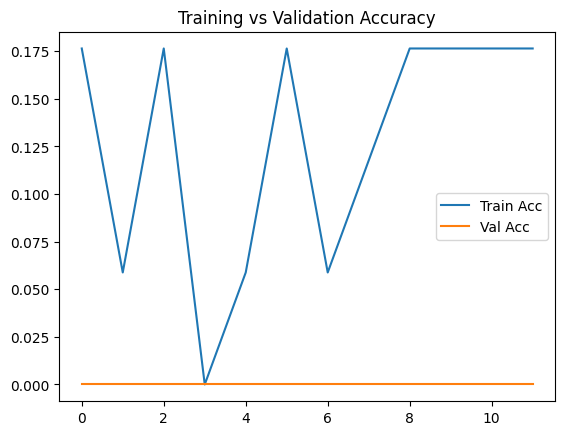

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.0000e+00 - loss: 2.8515
✅ Test Accuracy: 0.00%


In [ ]:
# ======================================
# 9️⃣  EVALUATE MODEL
# ======================================
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

In [ ]:
# ======================================
# 🔟  SAVE MODEL
# ======================================
model.save('/content/TraceFinder_CNN.h5')
print("Model saved as TraceFinder_CNN.h5")

Model saved as TraceFinder_CNN.h5


In [ ]:
# ======================================
# 11️⃣  SIMPLE INFERENCE FUNCTION
# ======================================
def predict_scanner(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    img = img.reshape(1, IMG_SIZE, IMG_SIZE, 1)
    pred = model.predict(img)
    class_name = le.inverse_transform([np.argmax(pred)])[0]
    confidence = np.max(pred) * 100
    print(f"Predicted Scanner: {class_name} ({confidence:.2f}% confidence)")

# Example usage:
# predict_scanner("/content/drive/MyDrive/Flatfield/Epson/sample1.tif")